[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/IIC2613-Inteligencia-Artificial-2021-2/Syllabus/blob/main/Ayudantias/Ayudantia01/Ayudantia01_Busqueda.ipynb)


In [ ]:
import networkx as nx
from networkx.drawing.nx_pydot import pydot_layout

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Lista de adyacencia
graph = [
         [2, 7, 8],   # 1 -> 2, 7, 8
         [1, 3, 6],   # 2
         [2, 4, 5],   # 3
         [3, 13],     # 4
         [3],         # 5
         [2],         # 6
         [1, 13],     # 7
         [1, 9, 12],  # 8
         [8, 10, 11], # 9
         [9],         # 10
         [9],         # 11
         [8],         # 12
         [4, 7]       # 13
]

In [ ]:
elist = [(i + 1, j) for i in range(len(graph)) for j in graph[i] if i < j]
G = nx.Graph()
G.add_edges_from(elist)

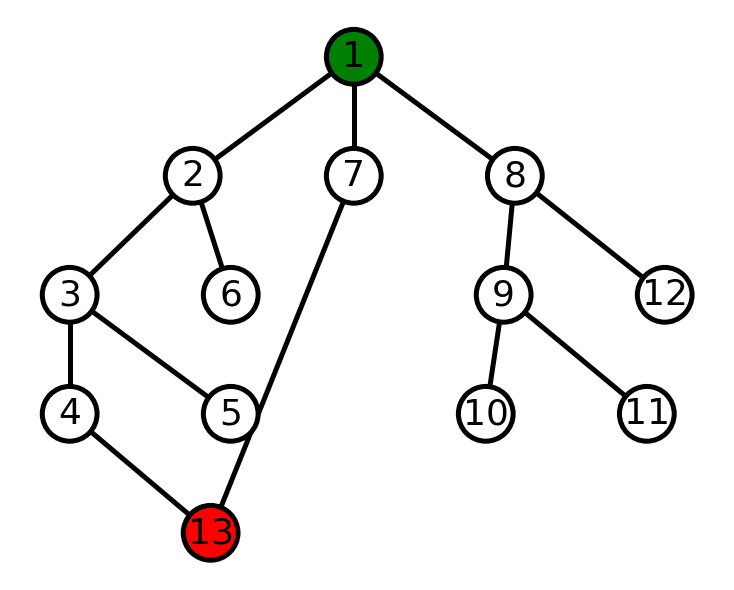

In [ ]:
plt.figure(figsize=(10, 8))
options = {
    "font_size": 36,
    "node_size": 3000,
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}
colors = ["white" for _ in range(len(graph))]
colors[0] = "green"
colors[8] = "red"
pos = pydot_layout(G, prog="dot", root=1)
nx.draw(G, pos,with_labels=True, node_color=colors, **options)

# DFS Loop-safe
Para este grafo vamos a ver que dependiendo de como se escojan los nodos a visitar, DFS puede encontrar distintos caminos. En este caso vamos a implementar la estructura closed con una lista de booleanos porque los nodos son identificados con números enteros y no hay necesidad de hashearlos.

In [ ]:
def _dfs(graph, current_state, goal, visited, path):
  if current_state == goal:
    return path + [current_state]

  if visited[current_state - 1]: # Le restamos 1 para indexar desde 0
    return None
  visited[current_state - 1] = True

  for neighbor in graph[current_state - 1][::-1]: # Damos vuelta el orden en el que recorremos los nodos vecino
  #for neighbor in graph[current_state - 1]:
    path_found = _dfs(graph, neighbor, goal, visited, path + [current_state])
    if path_found:
      return path_found
  return None


def dfs(graph, start, goal):
  visited = [False for _ in graph]
  path = []
  return _dfs(graph, start, goal, visited, path)

In [ ]:
dfs(graph, 1, 13)

[1, 7, 13]

# BFS
BFS por otro lado siempre va a encontrar el camino más corto (en cuanto a pasos), pero con el costo agregado de que tiene que explorar todos los nodos de una profundidad para avanzar a la siguiente.

En la siguiente implementación vamos usar un pequeño truco para poder recuperar el mejor camino. El truco consiste en que en vez de guardar booleanos en la lista Closed (visited) vamos a guardar el nodo desde el que llegó.

In [ ]:
from collections import deque

def bfs(graph, start, goal):
  visited = [0 for _ in graph]
  
  open = deque()
  open.append(start)
  visited[0] = 1
  while len(open): # Mientras haya algo dentro de la cola
    current_state = open.popleft()
    if current_state == goal:
      break
    #for neighbor in graph[current_state - 1][::-1]:
    for neighbor in graph[current_state - 1]:
      if visited[neighbor - 1] or neighbor in open:
        continue
      visited[neighbor - 1] = current_state # Guardo desde que nodo (current_state) se llegó al vecino (neighbor)
      open.append(neighbor)
  return visited

In [ ]:
def recover_path(parents, goal):
  current_state = goal
  parent = parents[goal - 1]
  path = [goal]
  while current_state != parent:
    current_state = parent
    parent = parents[current_state - 1]
    path.append(current_state)
  return path[::-1]

In [ ]:
visited_bfs = bfs(graph, 1, 13)
recover_path(visited_bfs, 13)

[1, 7, 13]

In [ ]:
visited_bfs = bfs(graph, 1, 5)
recover_path(visited_bfs, 5)

[1, 2, 3, 5]